<a href="https://colab.research.google.com/github/Emalte1/SIMULACION-1./blob/main/SIMULACION_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📊 ANÁLISIS FTLC SIN CONTROL:
Polos: [-0.5715+0.55766276j -0.5715-0.55766276j]
Zeta (ζ): 0.7157
Máximo sobreimpulso (Mp): 4.00%
Tiempo de establecimiento (ts): 7.45 s
Error en estado estacionario (ess): 0.5007


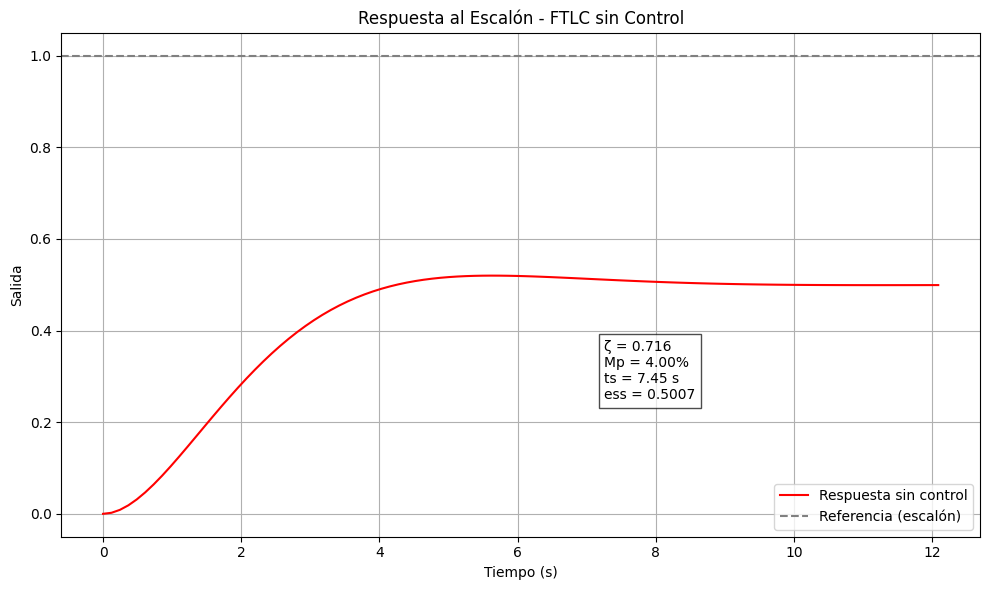

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control

# ⚙️ Definir la planta
num = [0.3188]
den = [1, 1.143, 0.3188]
G = control.tf(num, den)

# 🎯 Sistema en lazo cerrado (retroalimentación unitaria)
T = control.feedback(G, 1)

# ▶ Respuesta al escalón
t, y = control.step_response(T)

# 📍 Polos del sistema
poles = T.poles() # Cambio aquí: Usar el método .poles() del objeto TransferFunction

p = poles[0]  # Uno de los polos complejos
real_p = np.real(p)
imag_p = np.imag(p)

# 🧠 Cálculo de zeta y Mp
zeta = -real_p / np.sqrt(real_p**2 + imag_p**2)
# Asegurarse de que zeta esté en el rango válido para evitar errores en sqrt(1 - zeta^2)
if np.abs(zeta) > 1:
    print("Advertencia: Zeta es mayor que 1, el sistema puede ser sobreamortiguado. El cálculo de Mp podría no ser significativo.")
    Mp = 0 # O manejar de otra forma si zeta > 1
else:
    Mp = np.exp(-np.pi * zeta / np.sqrt(1 - zeta**2)) * 100

# 🔍 Otros datos
ess = abs(1 - y[-1])
info = control.step_info(T)
ts = info['SettlingTime']

# 📊 Mostrar resultados
print("\n📊 ANÁLISIS FTLC SIN CONTROL:")
print(f"Polos: {poles}")
print(f"Zeta (ζ): {zeta:.4f}")
print(f"Máximo sobreimpulso (Mp): {Mp:.2f}%")
print(f"Tiempo de establecimiento (ts): {ts:.2f} s")
print(f"Error en estado estacionario (ess): {ess:.4f}")

# 📈 Graficar la respuesta
plt.figure(figsize=(10, 6))
plt.plot(t, y, label="Respuesta sin control", color="red")
plt.axhline(1, color='gray', linestyle='--', label="Referencia (escalón)")

# 📝 Anotar resultados
plt.text(t[-1]*0.6, 0.25, f"ζ = {zeta:.3f}\nMp = {Mp:.2f}%\nts = {ts:.2f} s\ness = {ess:.4f}",
         fontsize=10, color="black", bbox=dict(facecolor='white', alpha=0.7))

plt.title("Respuesta al Escalón - FTLC sin Control")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Funcion de transferencia en LA de la planta: 
<TransferFunction>: sys[55]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          0.3188
  ----------------------
  s^2 + 1.143 s + 0.3188
Funcion de transferencia en lazo cerrado: 
<TransferFunction>: sys[57]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          0.3188
  ----------------------
  s^2 + 1.143 s + 0.6376


/usr/local/lib/python3.12/dist-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


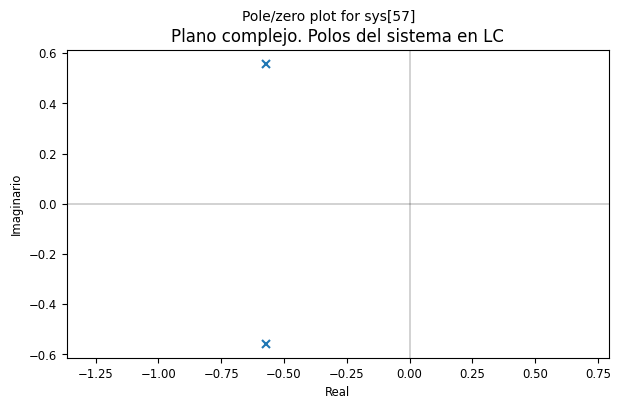

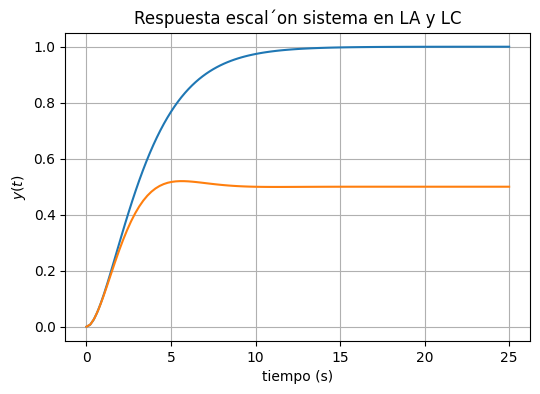

In [ ]:
#Funciones matem´aticas
import numpy as n
# Funciones para graficos
3
import matplotlib.pyplot as plt
# Funciones parecidas a Matlab
from control.matlab import *
#definici´on del sistema
num=[0.3188]
den=[1., 1.143, 0.3188]
ftla= tf(num, den)
print("Funcion de transferencia en LA de la planta: ")
print(ftla)
ftlc=feedback(ftla,1)
print("Funcion de transferencia en lazo cerrado: ")
print(ftlc)
# Grafico de polos y ceros del sistema enlazo cerrado.
plt.figure(1, figsize=[7, 4])
pzmap(ftlc)
plt.xlabel("Real")
plt.ylabel("Imaginario")
plt.title("Plano complejo. Polos del sistema en LC")
plt.show(block=False)
# Respuesta escal´on del sistema en LA y LC
plt.figure(2, figsize=[6, 4])
yout, T = step(ftla, T=25)
yout1, T1 = step(ftlc, T=25)
plt.plot(T.T, yout.T,T1.T,yout1.T)
plt.xlabel("tiempo (s)")
plt.ylabel("$y(t)$")
plt.title("Respuesta escal´on sistema en LA y LC")
plt.grid()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 13.8 MB/s eta 0:00:00


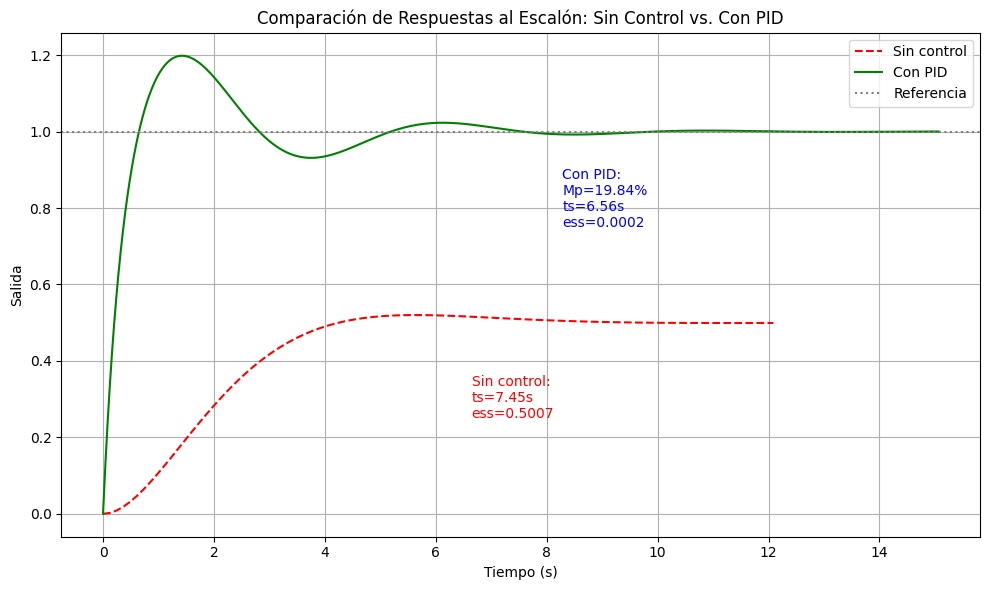

In [2]:
!pip install control
import matplotlib.pyplot as plt
import numpy as np
import control

# Planta sin control
num_plant = [0.3188]
den_plant = [1, 1.143, 0.3188]
G = control.tf(num_plant, den_plant)

# Sistema sin control (lazo cerrado unitario)
T_open = control.feedback(G, 1)

# PID diseñado
Kd = 10.188
Kp = 15.148
Ki = 21.37
C = control.tf([Kd, Kp, Ki], [1, 0])
T_pid = control.feedback(C * G, 1)

# Simulaciones
t_open, y_open = control.step_response(T_open)
t_pid, y_pid = control.step_response(T_pid)

# Métricas sin control
info_open = control.step_info(T_open)
Mp_open = info_open['Overshoot']
ts_open = info_open['SettlingTime']
ess_open = abs(1 - y_open[-1])

# Métricas con PID
info_pid = control.step_info(T_pid)
Mp_pid = info_pid['Overshoot']
ts_pid = info_pid['SettlingTime']
ess_pid = abs(1 - y_pid[-1])

# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(t_open, y_open, label='Sin control', linestyle='--', color='red')
plt.plot(t_pid, y_pid, label='Con PID', linestyle='-', color='green')
plt.axhline(1, color='gray', linestyle=':', label='Referencia')

# Anotaciones para SIN CONTROL
plt.text(t_open[-1]*0.55, 0.25, f"Sin control:\nts={ts_open:.2f}s\ness={ess_open:.4f}",
         fontsize=10, color='red')

# Anotaciones para CON PID
plt.text(t_pid[-1]*0.55, 0.75, f"Con PID:\nMp={Mp_pid:.2f}%\nts={ts_pid:.2f}s\ness={ess_pid:.4f}",
         fontsize=10, color='blue')

# Configuración del gráfico
plt.title("Comparación de Respuestas al Escalón: Sin Control vs. Con PID")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install control

New PID Gains used for simulation:
  Kd = 11.0529
  Kp = 19.6472
  Ki = 22.3534

Performance Metrics with New PID Controller:
  Maximum Overshoot (Mp): 17.32%
  Settling Time (ts): 4.38 s
  Steady-State Error (ess): 0.0003


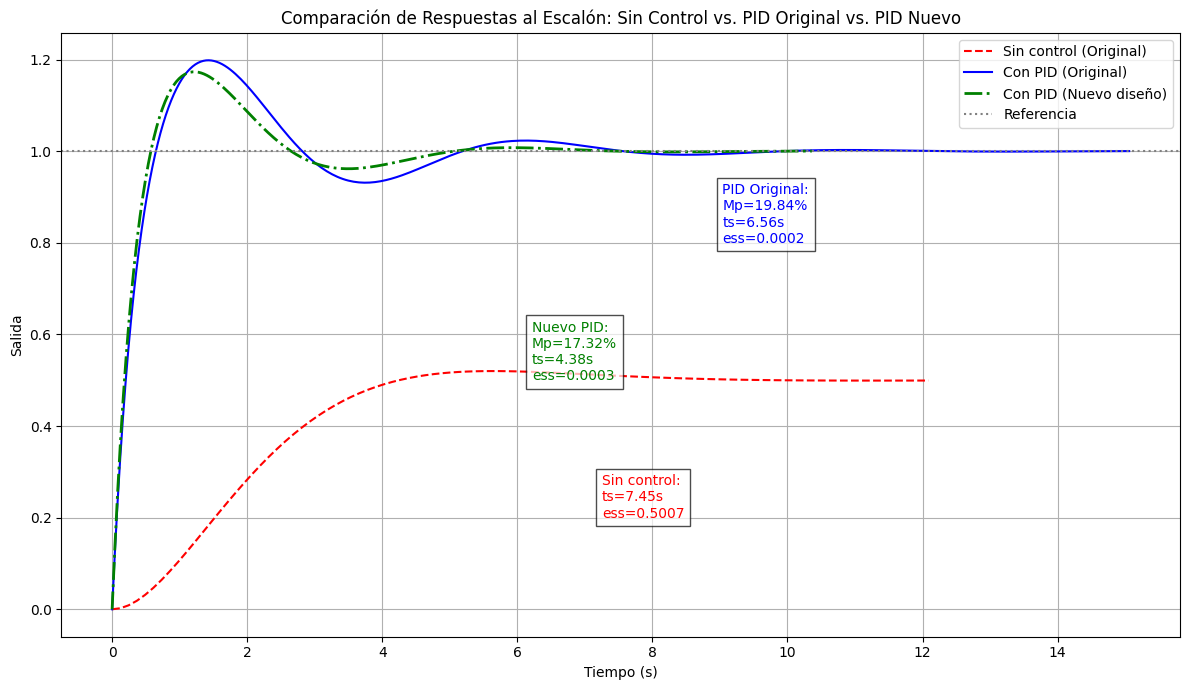

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control

# Define the plant transfer function G(s)
num_plant = [0.3188]
den_plant = [1, 1.143, 0.3188]
G = control.tf(num_plant, den_plant)

# Retrieve the calculated PID gains from the kernel state
Kd_new = Kd_val
Kp_new = Kp_val
Ki_new = Ki_val

print(f"New PID Gains used for simulation:")
print(f"  Kd = {Kd_new:.4f}")
print(f"  Kp = {Kp_new:.4f}")
print(f"  Ki = {Ki_new:.4f}")

# Define the new PID controller C(s)
# C(s) = Kd*s + Kp + Ki/s = (Kd*s^2 + Kp*s + Ki) / s
num_C = [Kd_new, Kp_new, Ki_new]
den_C = [1, 0] # For 's' in the denominator
C_new = control.tf(num_C, den_C)

# Formulate the closed-loop system with the new PID controller
T_new_pid = control.feedback(C_new * G, 1)

# Simulate the step response of the new closed-loop system
t_new_pid, y_new_pid = control.step_response(T_new_pid)

# Calculate performance metrics for the new PID system
info_new_pid = control.step_info(T_new_pid)
Mp_new_pid = info_new_pid.get('Overshoot', 0)
ts_new_pid = info_new_pid.get('SettlingTime', np.inf)
ess_new_pid = abs(1 - y_new_pid[-1]) if len(y_new_pid) > 0 else np.inf

print(f"\nPerformance Metrics with New PID Controller:")
print(f"  Maximum Overshoot (Mp): {Mp_new_pid:.2f}%")
print(f"  Settling Time (ts): {ts_new_pid:.2f} s")
print(f"  Steady-State Error (ess): {ess_new_pid:.4f}")

# Retrieve data for existing plots (from cell 50q-ygk8ua0k if available, or re-calculate for robustness)
# Planta sin control
num_plant_orig = [0.3188]
den_plant_orig = [1, 1.143, 0.3188]
G_orig = control.tf(num_plant_orig, den_plant_orig)

# Sistema sin control (lazo cerrado unitario)
T_open_orig = control.feedback(G_orig, 1)

# PID diseñado (from cell 50q-ygk8ua0k)
Kd_orig = 10.188
Kp_orig = 15.148
Ki_orig = 21.37
C_orig = control.tf([Kd_orig, Kp_orig, Ki_orig], [1, 0])
T_pid_orig = control.feedback(C_orig * G_orig, 1)

# Simulaciones for original systems
t_open_orig, y_open_orig = control.step_response(T_open_orig)
t_pid_orig, y_pid_orig = control.step_response(T_pid_orig)

# Gráfico comparativo
plt.figure(figsize=(12, 7))
plt.plot(t_open_orig, y_open_orig, label='Sin control (Original)', linestyle='--', color='red')
plt.plot(t_pid_orig, y_pid_orig, label='Con PID (Original)', linestyle='-', color='blue')
plt.plot(t_new_pid, y_new_pid, label='Con PID (Nuevo diseño)', linestyle='-.', color='green', linewidth=2)
plt.axhline(1, color='gray', linestyle=':', label='Referencia')

# Annotations for NEW PID
plt.text(t_new_pid[-1]*0.6, 0.5,
         f"Nuevo PID:\nMp={Mp_new_pid:.2f}%\nts={ts_new_pid:.2f}s\ness={ess_new_pid:.4f}",
         fontsize=10, color='green', bbox=dict(facecolor='white', alpha=0.7))

# Annotations for ORIGINAL PID (from previous run)
info_pid_orig = control.step_info(T_pid_orig)
Mp_pid_orig = info_pid_orig.get('Overshoot', 0)
ts_pid_orig = info_pid_orig.get('SettlingTime', np.inf)
ess_pid_orig = abs(1 - y_pid_orig[-1]) if len(y_pid_orig) > 0 else np.inf
plt.text(t_pid_orig[-1]*0.6, 0.8,
         f"PID Original:\nMp={Mp_pid_orig:.2f}%\nts={ts_pid_orig:.2f}s\ness={ess_pid_orig:.4f}",
         fontsize=10, color='blue', bbox=dict(facecolor='white', alpha=0.7))

# Annotations for NO CONTROL (from previous run)
info_open_orig = control.step_info(T_open_orig)
ts_open_orig = info_open_orig.get('SettlingTime', np.inf)
ess_open_orig = abs(1 - y_open_orig[-1]) if len(y_open_orig) > 0 else np.inf
plt.text(t_open_orig[-1]*0.6, 0.2,
         f"Sin control:\nts={ts_open_orig:.2f}s\ness={ess_open_orig:.4f}",
         fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.7))

plt.title("Comparación de Respuestas al Escalón: Sin Control vs. PID Original vs. PID Nuevo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


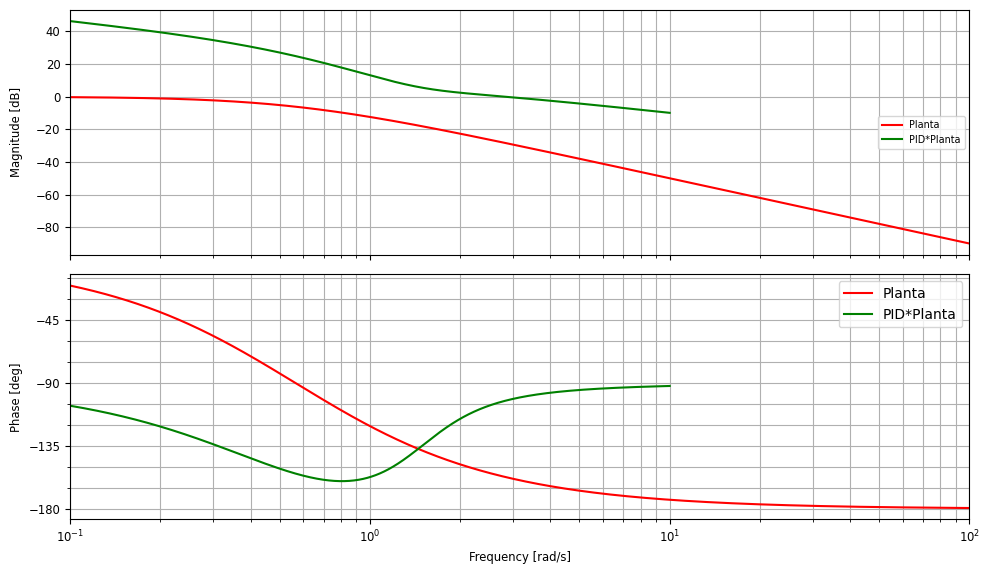

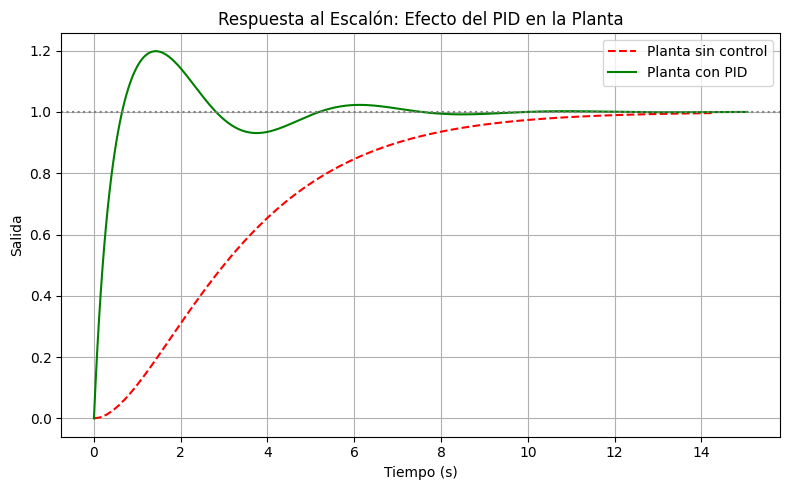

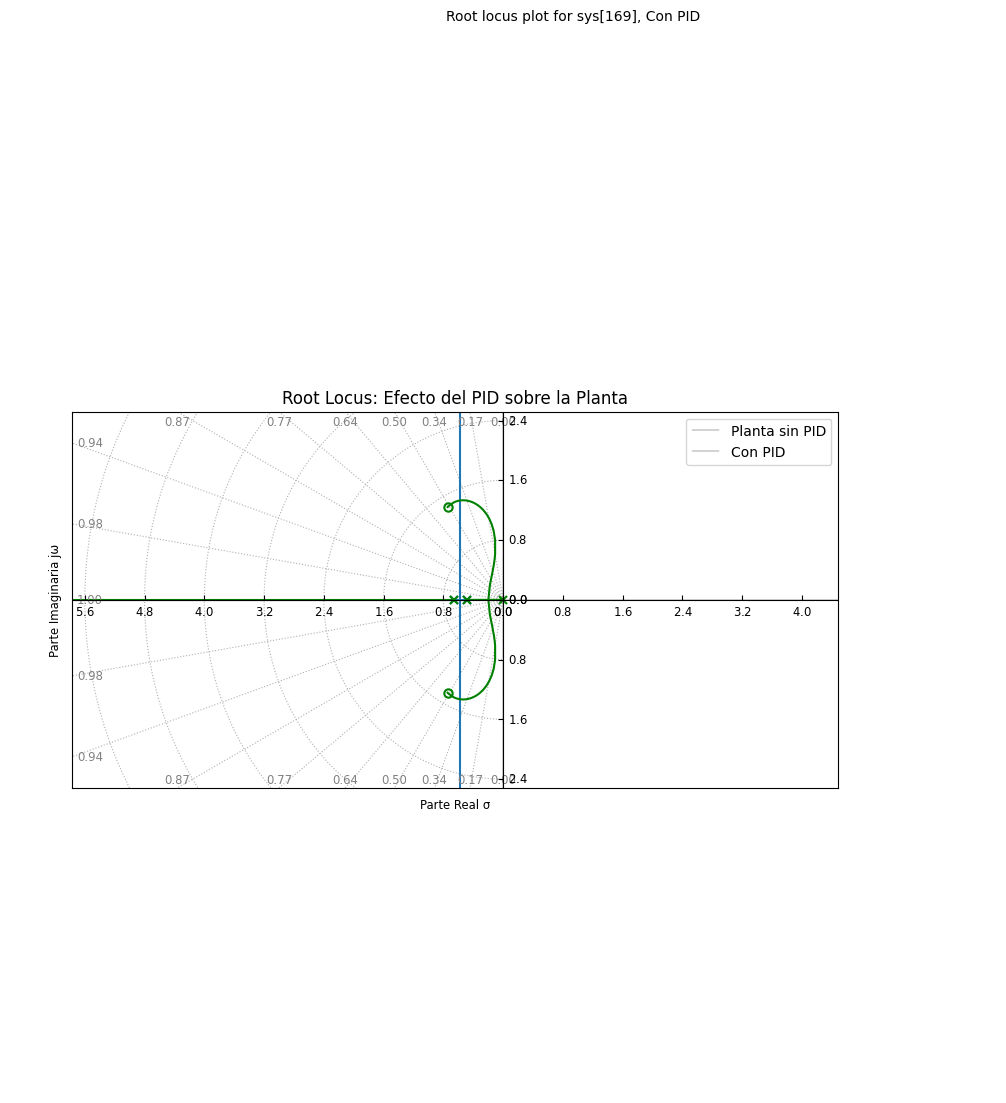

In [24]:
import control
import matplotlib.pyplot as plt

# --- Planta original ---
num_plant = [0.3188]
den_plant = [1, 1.143, 0.3188]
G = control.tf(num_plant, den_plant)

# --- Controlador PID ---
Kd = 10.188
Kp = 15.148
Ki = 21.37
C = control.tf([Kd, Kp, Ki], [1, 0])

# --- Sistema combinado ---
L = C * G          # Lazo abierto controlado
T = control.feedback(L, 1)   # Lazo cerrado controlado

# --- 1. Diagrama de Bode ---
plt.figure(figsize=(10, 6))
control.bode(G, dB=True, label='Planta', color='r', omega_limits=(0.1,100))
control.bode(L, dB=True, label='PID*Planta', color='g')
plt.suptitle("Comparación del Bode: Planta vs Planta con PID", y=1.05)
plt.legend()
plt.tight_layout()

# --- 2. Respuesta al escalón ---
plt.figure(figsize=(8, 5))
t1, y1 = control.step_response(G)
t2, y2 = control.step_response(T)
plt.plot(t1, y1, 'r--', label='Planta sin control')
plt.plot(t2, y2, 'g', label='Planta con PID')
plt.axhline(1, color='gray', linestyle=':')
plt.title("Respuesta al Escalón: Efecto del PID en la Planta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.legend()
plt.grid(True)
plt.tight_layout()

# --- 3. Lugar geométrico de las raíces ---
plt.figure(figsize=(14, 12))
control.root_locus(G, grid=True) # Removed 'Plot=False'
control.root_locus(L, grid=True, color='g', label='Con PID')
plt.title("Root Locus: Efecto del PID sobre la Planta")
plt.xlabel("Parte Real σ")
plt.ylabel("Parte Imaginaria jω")
plt.legend(['Planta sin PID', 'Con PID'])
plt.tight_layout()
plt.show()

Original PID gains: Kd=10.188, Kp=15.148, Ki=21.370
Realizable PID (N=100): C(s) = 10.3395s^2 + 15.3617s + 21.3700 / (0.0100s^2 + 1.0000s)


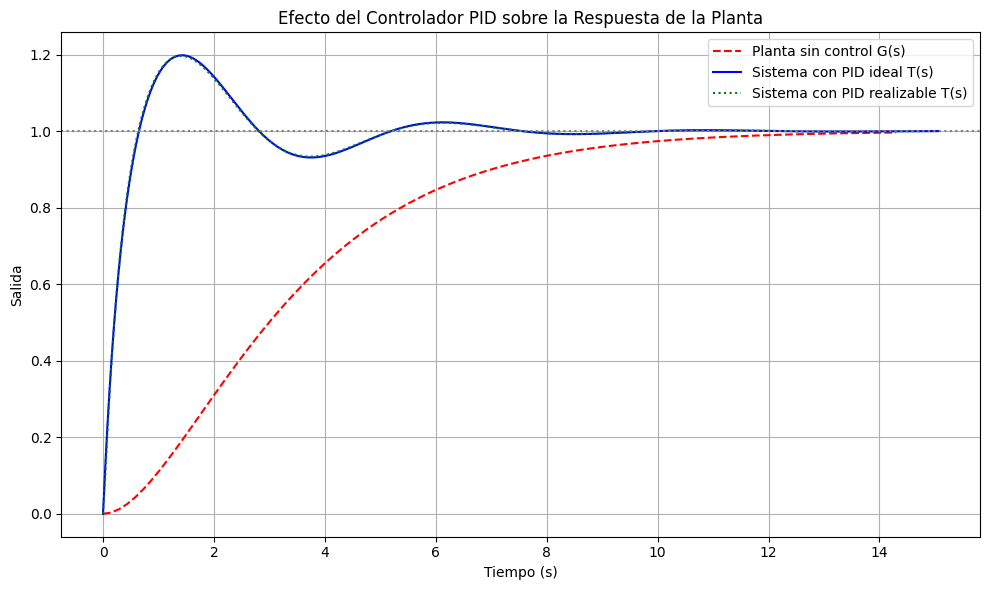

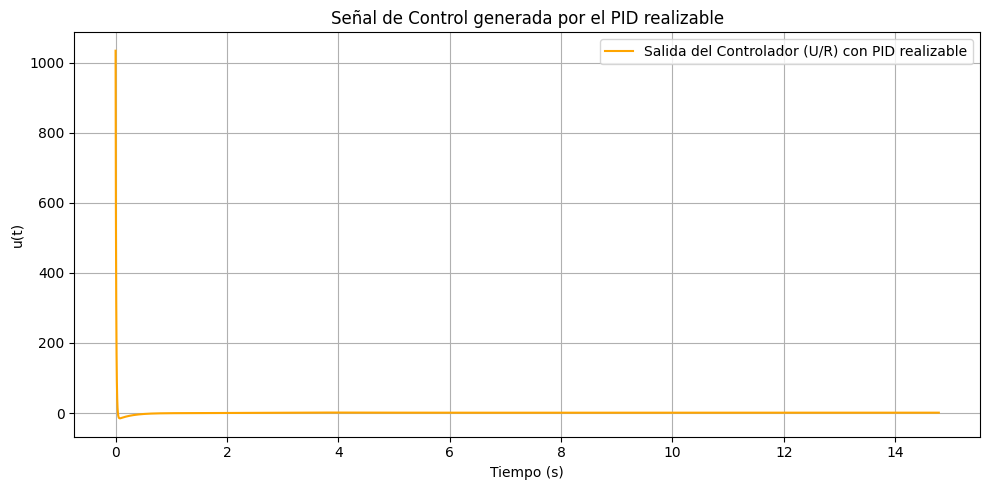

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control

# --- Planta ---
num_plant = [0.3188]
den_plant = [1, 1.143, 0.3188]
G = control.tf(num_plant, den_plant)

# --- Controlador PID (original, no proper) ---
Kd_orig = 10.188
Kp_orig = 15.148
Ki_orig = 21.37

# --- Modificación para hacer el controlador PID realizable (proper) ---
# Se añade un polo de alta frecuencia al término derivativo.
# C(s) = Kp + Ki/s + Kd*s/(1 + s/N)
# Se elige N = 100 para un polo de alta frecuencia (s = -N)
N = 100  # Filter parameter for the derivative term

# Numerador del PID realizable: (Kd_orig*s^2 + Kp_orig*s + Ki_orig) * (1 + s/N) / (1 + s/N) * s
# C(s) = ((Kd_orig*N + Kp_orig)*s^2 + (Kp_orig*N + Ki_orig)*s + Ki_orig*N) / (s*(N + s))
# Denominator: s*(s/N + 1) = s^2/N + s
# Num: Kd_orig*s + Kp_orig + Ki_orig/s * (N*s)/(N*s) => (Kd_orig*N*s^2 + Kp_orig*N*s + Ki_orig*N) / (N*s)

# Re-deriving the realizable PID transfer function: C(s) = Kp + Ki/s + (Kd*s)/(1+s/N)
# C(s) = (Kp*s*(1+s/N) + Ki*(1+s/N) + Kd*s^2) / (s*(1+s/N))
# C(s) = (Kp*s + Kp*s^2/N + Ki + Ki*s/N + Kd*s^2) / (s + s^2/N)
# C(s) = ((Kp/N + Kd)*s^2 + (Kp + Ki/N)*s + Ki) / ((1/N)*s^2 + s)

num_C_realizable = [(Kp_orig/N + Kd_orig), (Kp_orig + Ki_orig/N), Ki_orig]
den_C_realizable = [1/N, 1, 0] # Represents (1/N)s^2 + s
C_realizable = control.tf(num_C_realizable, den_C_realizable)

print(f"Original PID gains: Kd={Kd_orig:.3f}, Kp={Kp_orig:.3f}, Ki={Ki_orig:.3f}")
print(f"Realizable PID (N={N}): C(s) = {num_C_realizable[0]:.4f}s^2 + {num_C_realizable[1]:.4f}s + {num_C_realizable[2]:.4f} / ({den_C_realizable[0]:.4f}s^2 + {den_C_realizable[1]:.4f}s)")

# --- Función de lazo cerrado total (con el PID original, si se necesita su respuesta) ---
T_pid_orig = control.feedback(control.tf([Kd_orig, Kp_orig, Ki_orig], [1, 0]) * G, 1)

# --- Función de lazo cerrado con el PID realizable ---
T_pid_realizable = control.feedback(C_realizable * G, 1)

# --- Respuestas ---
t, y_G = control.step_response(G)           # Planta sin control
t_pid_orig, y_T_orig = control.step_response(T_pid_orig)       # Sistema con PID original
t_pid_realizable, y_T_realizable = control.step_response(T_pid_realizable) # Sistema con PID realizable

# Calculate U/R using the realizable PID for simulation of control effort
# U(s)/R(s) = C_realizable(s) / (1 + C_realizable(s)G(s))
T_u = control.feedback(C_realizable, G) # This calculates U(s)/R(s) properly now
t_u, y_U = control.step_response(T_u)  # Salida del controlador (U/R)

# --- Gráfico 1: Planta vs PID (efecto sobre la salida) ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_G, 'r--', label='Planta sin control G(s)')
plt.plot(t_pid_orig, y_T_orig, 'b-', label='Sistema con PID ideal T(s)')
plt.plot(t_pid_realizable, y_T_realizable, 'g:', label='Sistema con PID realizable T(s)')
plt.axhline(1, color='gray', linestyle=':')
plt.title('Efecto del Controlador PID sobre la Respuesta de la Planta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Gráfico 2: Salida del controlador (esfuerzo de control) ---
plt.figure(figsize=(10, 5))
plt.plot(t_u, y_U, color='orange', label='Salida del Controlador (U/R) con PID realizable')
plt.title('Señal de Control generada por el PID realizable')
plt.xlabel('Tiempo (s)')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()